# Teste de Hipóteses
## Erro Tp1: rejeitar H0 - estando H0 certo - aceitar Ha
## Erro Tp2: aceitar H0 - estando H0 errrado
- Nivel de Significância: probabidade (área sob a curva de densidade)do erro Tp
- estatística de teste: estatística amostral para decidir sobre rejeição ou não de H0
- região crítica: conjunto dos valores da estatística de teste que rejeitam H0
- valor crítico: separa a região crítica da região que não rejeita H0
---------------

In [1]:
from scipy.stats import norm
import scipy.stats
from scipy.stats import t as t_student
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [2]:
def rej(p, alfa):
    if (p<= alfa): r_teste= 'rejeitar'
    else: r_teste= 'não rejeitar'
    return r_teste 
d_cauda={'i':'Teste de cauda inferior', 's': 'Teste de cauda superior', 'b':'Teste bicaudal'} 
def Tp_teste(cauda, m_p):
    if(cauda=='i'):    
        tp_teste=d_cauda.get(cauda)
        H0= 'media >= '+ str(m_p)
        Ha= 'media < '+ str(m_p)
    elif(cauda=='s'):  
        tp_teste=d_cauda.get(cauda)
        H0= 'media <= '+ str(m_p)
        Ha= 'media > '+ str(m_p)
    elif(cauda== 'b'): 
        tp_teste=d_cauda.get(cauda)
        H0= 'media = '+ str(m_p)
        Ha= 'media <> '+ str(m_p)
    else: tp_teste='indefinido'
    l_teste= [H0,Ha,tp_teste]
    return l_teste

In [3]:
d= {'Teste de cauda inferior':['Ha: m < m_p','z_teste <= z_alfa','p <= alfa','i'],
    'Teste de cauda superior': ['Ha: m > m_p', 'z_teste >= z_alfa', 'p <= alfa','s'],
    'Teste bicaudal':['Ha: m <> m_p', 'z_teste <= z_alfa/2', 'p <= alfa','b']}
c_ind= ['Hip. alternativa', 'Rejeição valor crítico', 'Rejeição valor p', 'indicador na função']
pd.DataFrame(d,index=c_ind)

,Teste de cauda inferior,Teste de cauda superior,Teste bicaudal
Hip. alternativa,Ha: m < m_p,Ha: m > m_p,Ha: m <> m_p
Rejeição valor crítico,z_teste <= z_alfa,z_teste >= z_alfa,z_teste <= z_alfa/2
Rejeição valor p,p <= alfa,p <= alfa,p <= alfa
indicador na função,i,s,b


## 1. std população conhecido
## 2. [std população desconhecido](#std_d)
## 3. [Proporção Populacional](#p)

## std população conhecido

In [4]:
def z_teste1(m, m_p, std_p, n): 
    z_teste1= (m -m_p)/ ( std_p / n**0.5 )
    return float(z_teste1)
def x_Erro2(m_p, std_p, z_alfa, n):
    x2= m_p + z_alfa * std_p / n**0.5
    return x2

In [54]:
# Teste População:
m_p= 12.3                  # média da população a ser testada
std_p= 3.8             # desvio padrão da população
# Amostra:
m= 11.5                 # média da amostra
n= 35                   # tamanho da amostra
alfa= 0.04              # nível de significância
cauda= 'b'              # Teste de cauda i=inferior, s=superior, b=bicaudal
## rodar a célula
l_teste= Tp_teste(cauda,m_p)    
d={'H0':[l_teste[0]], 'Ha':[l_teste[1]],'Tipo':[l_teste[2]]}
pd.DataFrame(d, index=['Teste'])

,H0,Ha,Tipo
Teste,media = 12.3,media <> 12.3,Teste bicaudal


In [ ]:
#

In [92]:
z_teste= z_teste1(m, m_p, std_p, n)
rv= scipy.stats.norm(0,1)                 # rv = random variable - normal com media=0 e std=1
if(cauda=='b'): 
    p= 2* rv.sf(abs(z_teste))    # p_value
    z_alfa= rv.isf(alfa/2)
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_população':[std_p], 'p':[p],
        'Nivel de Significância':[alfa],'z_teste':[abs(z_teste)], 'z_alfa/2':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(p,alfa)]}
elif(cauda=='i'):  
    p= rv.cdf(z_teste)
    z_alfa= rv.ppf(alfa)                    # ppf inverse cdf
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_população':[std_p], 'p':[p], 
        'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(p,alfa)]}
elif(cauda=='s'): 
    p= rv.sf(z_teste)
    z_alfa = rv.isf(alfa)
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_população':[std_p], 'p':[p],
        'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(p,alfa)]}
else:
    p=0
    z_alfa= 0
    d= {'p':[p],'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa], 
        'H0':[l_teste[0]], 'Teste H0':['Indefinido']}
pd.DataFrame(d, index=[d_cauda.get(cauda)])   

,Média Amostra,Tam Amostra,std_população,p,Nivel de Significância,z_teste,z_alfa/2,H0,Teste H0
Teste bicaudal,11.5,35,3.8,0.212952,0.04,1.24549,2.053749,media = 12.3,não rejeitar


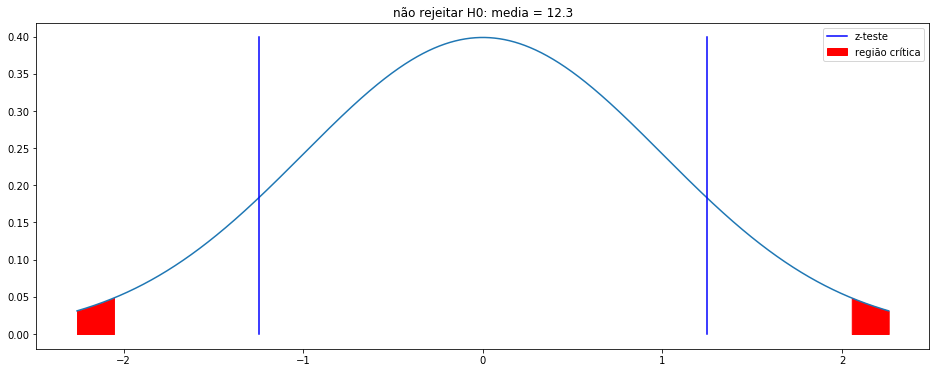

In [94]:
lim_g= max(abs(z_teste),abs(z_alfa))
x= np.linspace(-lim_g*1.1,lim_g*1.1,3000)       # gera um intervalo no eixo x em toda a distribuição
x_alfa2 = np.linspace(abs(z_alfa), lim_g*1.1,1000)  # intervalo na região critica superior
x_alfa1 = np.linspace(-lim_g*1.1, -abs(z_alfa), 1000)  # intervalo na região critica inferior
y= rv.pdf(x)
y_alfa2 = rv.pdf(x_alfa2)
y_alfa1 = rv.pdf(x_alfa1)
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title(rej(p,alfa) + ' H0: ' + l_teste[0])
ax.plot(x,y)
if(cauda=='b'): 
    #ax.plot(x,y)
    ax.fill_between(x_alfa2, y_alfa2, color='r', label='região crítica')
    ax.fill_between(x_alfa1, y_alfa1, color='r')
    ax.plot([abs(z_teste), abs(z_teste)], [0, rv.pdf(0)], color= 'b', label='z-teste')
    ax.plot([-abs(z_teste), -abs(z_teste)], [0, rv.pdf(0)], color= 'b')
    #ax.plot([z_teste, z_teste], [0, rv.pdf(0)], color= 'b', label='z-teste')
    #ax.legend()
if (cauda=='i'):
    ax.fill_between(x_alfa1, y_alfa1, color='r', label='região crítica')
    ax.plot([-abs(z_teste), -abs(z_teste)], [0, rv.pdf(0)], color= 'b', label='z-teste')
if (cauda=='s'):
    ax.fill_between(x_alfa2, y_alfa2, color='r', label='região crítica')
    ax.plot([abs(z_teste), abs(z_teste)], [0, rv.pdf(0)], color= 'b', label='z-teste')
ax.legend()    

In [ ]:
# Rodar a célula abaixo somente para teste bilateral

In [96]:
# erro_padrão_Media_amostra (std_p,  N  (populacao),  n= tamanho amostra)
def std_m(std_p,n):                               # n/N < 0.05 ou populacao infinita
    return float(std_p/n**0.5)
def std_m_N(std_p,n,N):   
    return float((N-n)/(N-1)*std_p/n**0.5)
a_conf= 1- alfa                              # nivel
e_m= std_m(std_p,n)    # n/N < 0.05         # desvio padrão da amostra com base n
#ic= norm.interval(a_conf,m,e_m)             # calcula limites do intervalo com base no nivel de confiança
# alternativamente:
E = z_alfa * std_p / n**0.5
ic = (m - E, m + E)
d={'H0':[l_teste[0]], 'Intev. Confiança da amostra':[(round(ic[0],4),round(ic[1],4))] ,'Teste H0':[rej(p,alfa)]}
pd.DataFrame(d, index=['somente para teste bicaudal com pop. infinita'])

,H0,Intev. Confiança da amostra,Teste H0
somente para teste bicaudal com pop. infinita,media = 12.3,"(10.1808, 12.8192)",não rejeitar


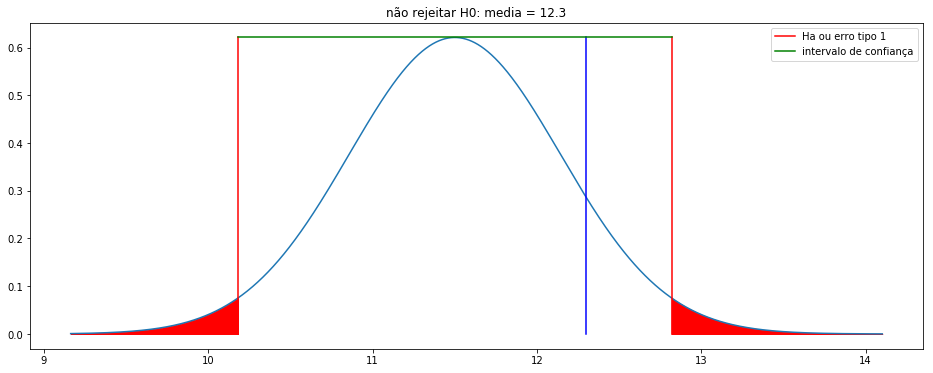

In [118]:
lim2= max(ic[1],m)
lim1 = m - abs(lim2 - m)
x= np.linspace(lim1*0.9,lim2*1.1,3000)       # gera um intervalo no eixo x em toda a distribuição
x_alfa2 = np.linspace(ic[1], lim2*1.1,1000)  # intervalo na região critica superior
x_alfa1 = np.linspace(lim1*0.9, ic[0], 1000)  # intervalo na região critica inferior
rv_a= scipy.stats.norm(m, e_m)                 # rv = random variable - normal com media=0 e std=1
y= rv_a.pdf(x)
y_alfa2 = rv_a.pdf(x_alfa2)
y_alfa1 = rv_a.pdf(x_alfa1)
fig, ax = plt.subplots(figsize=(16,6))
ax.set_title(rej(p,alfa) + ' H0: ' + l_teste[0])
ax.plot(x,y)
ax.plot([ic[0], ic[0]], [0, rv_a.pdf(m)], color='r', label='Ha ou erro tipo 1')
ax.plot([ic[1], ic[1]], [0, rv_a.pdf(m)], color='r')
ax.plot([m_p, m_p], [0, rv_a.pdf(m)], color='b')         # média poupulação
ax.fill_between(x_alfa1, rv_a.pdf(x_alfa1), color='r')
ax.fill_between(x_alfa2, rv_a.pdf(x_alfa2), color='r')
ax.plot([ic[0], ic[1]], [rv_a.pdf(m),rv_a.pdf(m)], color='g', label='intervalo de confiança')
ax.legend()

<a id='std_d'></a>
## std população desconhecido

In [23]:
def t_Teste(m, m_p, std, n): 
    t_teste= (m -m_p)/ ( std / n**0.5 )
    return float(t_teste)

In [21]:
m_p= 2500                  # média da população a ser testada
# Amostra:
m= 2500.9                 # média da amostra
std= 1008.4**0.5             # desvio padrão da amostra
n= 12                   # tamanho da amostra
alfa= 0.03              # nível de significância
cauda= 'b'              # Teste de cauda i=inferior, s=superior, b=bicaudal
## rodar a célula
l_teste= Tp_teste(cauda,m_p)    
d={'H0':[l_teste[0]], 'Ha':[l_teste[1]],'Tipo':[l_teste[2]]}
pd.DataFrame(d, index=['Teste'])

,H0,Ha,Tipo
Teste,media >= 2500,media < 2500,Teste de cauda inferior


In [22]:
t_teste= t_Teste(m, m_p, std, n)
rv= t_student(n-1)
if(cauda=='b'): 
    p= 2* rv.sf(abs(t_teste))
    t_alfa= rv.isf(alfa/2)
    margem_err= abs(rv.ppf(alfa/2) * std / n**0.5)
    intervalo_confianca= (round(m-margem_err,4), round(m+margem_err,4))
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_amostra':[std], 'p':[p],
        'Nivel de Significância':[alfa],'t_teste':[abs(t_teste)], 't_alfa/2':[t_alfa],
        'H0':[l_teste[0]], 'Interv. Conf':[intervalo_confianca],'Teste H0':[rej(p,alfa)]}
elif(cauda=='i'):  
    p= rv.cdf(t_teste)
    t_alfa= rv.ppf(alfa)                    # ppf inverse cdf
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_amostra':[std], 'p':[p], 
        'Nivel de Significância':[alfa],'t_teste':[t_teste], 't_alfa':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(p,alfa)]}
elif(cauda=='s'): 
    p= rv.sf(t_teste)
    t_alfa = rv.isf(alfa)
    d= {'Média Amostra':[m], 'Tam Amostra':[n], 'std_amostra':[std], 'p':[p],
        'Nivel de Significância':[alfa],'t_teste':[t_teste], 't_alfa':[t_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(p,alfa)]}
else:
    p=0
    t_alfa= 0
    d= {'p':[p],'Nivel de Significância':[alfa],'t_teste':[t_teste], 't_alfa':[t_alfa], 
        'H0':[l_teste[0]], 'Teste H0':['Indefinido']}
pd.DataFrame(d, index=[d_cauda.get(cauda)])  

,Média Amostra,Tam Amostra,std_amostra,p,Nivel de Significância,t_teste,t_alfa,H0,Teste H0
Teste de cauda inferior,2500.9,12,31.755315,0.538222,0.03,0.098179,-2.326348,media >= 2500,não rejeitar


Text(0.5, 0, 'não rejeitar H0')

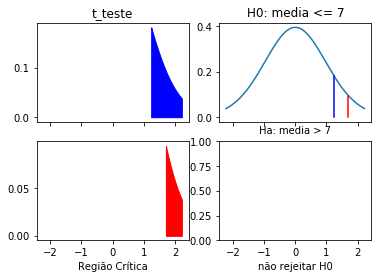

In [7]:
lim_g= max(abs(t_teste),abs(t_alfa))
x= np.linspace(-lim_g*1.3,lim_g*1.3,3000)       # gera um intervalo no eixo x em toda a distribuição
y= rv.pdf(x)
if(cauda=='i'):  
    x1= np.linspace(-lim_g*1.3, t_teste, 3000)       # intervalor x entre limite inferior e z_teste
    y1= rv.pdf(x1)
    x2= np.linspace(-lim_g*1.3, t_alfa,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
if(cauda=='s'):  
    x1= np.linspace(t_teste, lim_g*1.3,3000)       # intervalor x entre z_teste e limite superior
    y1= rv.pdf(x1)
    x2= np.linspace(t_alfa,lim_g*1.3,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
if(cauda=='b'):  
    x1= np.linspace(t_teste, -t_teste,3000)       # intervalor x entre z_teste e limite superior
    y1= rv.pdf(x1)
    x2= np.linspace(t_alfa,lim_g*1.3,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
    a[1][0].fill_between(-x2,rv.pdf(-x2),color='red')                    # área região  critica inferior
    a[0][1].plot([-t_alfa, -t_alfa], [0, rv.pdf(t_alfa)], color= 'red') # marcação reg. critica inferior
a[0][0].fill_between(x1,y1, color='blue')
a[0][0].set_title('t_teste')
a[1][0].fill_between(x2,y2,color='red')
a[1][0].set_xlabel('Região Crítica')
a[0][1].plot(x,y)
a[0][1].plot([t_teste,t_teste],[0,rv.pdf(t_teste)], color='blue')
a[0][1].plot([t_alfa, t_alfa], [0, rv.pdf(t_alfa)], color= 'red')
a[0][1].set_title('H0: '+l_teste[0])
a[0][1].set_xlabel('Ha: '+l_teste[1])
a[1][1].set_xlabel(rej(p,alfa) + ' H0')

# <a id='p'></a>
# Proporção Populacional
## Condições para o teste:
- condições de experimento binomial (nº fixo de provas independentes e probabilidade constante: sucesso ou fracasso)
- np >= 5  e   n(1-p) >= 5

In [5]:
def z_Testep(p, p_pop, n):
    z_p= float( (p-p_pop) / ( (p_pop*(1-p_pop)/n) **0.5 )  )
    return z_p
def p_Teste(cauda, p_pop):
    if(cauda=='i'):    
        tp_teste=d_cauda.get(cauda)
        H0= 'p >= '+ str(p_pop)
        Ha= 'p < '+ str(p_pop)
    elif(cauda=='s'):  
        tp_teste=d_cauda.get(cauda)
        H0= 'p <= '+ str(p_pop)
        Ha= 'p > '+ str(p_pop)
    elif(cauda== 'b'): 
        tp_teste=d_cauda.get(cauda)
        H0= 'p = '+ str(p_pop)
        Ha= 'p <> '+ str(p_pop)
    else: tp_teste='indefinido'
    l_teste= [H0,Ha,tp_teste]
    return l_teste

In [9]:
# Amostra:
n= 100                   # tamanho da amostra
p= 10/n                 # proporção amostral (sample)
#Teste:
p_pop= 0.05            # proporção da população a ser testada
alfa= 0.05              # nível de significância
cauda= 's'              # Teste de cauda i=inferior, s=superior, b=bicaudal
## rodar a célula
l_teste= p_Teste(cauda, p_pop)    
d={'H0':[l_teste[0]], 'Ha':[l_teste[1]],'Tipo':[l_teste[2]], 'p':[p], 'n':[n], 'np':[n*p], 'n(1-p)':n*(1-p)}
# np e n(1-p) >=5                                   # distribuição amostral de p pode ser aproximada a uma distribuição normal
pd.DataFrame(d, index=['Teste'])

,H0,Ha,Tipo,p,n,np,n(1-p)
Teste,p <= 0.05,p > 0.05,Teste de cauda superior,0.1,100,10.0,90.0


In [10]:
z_teste= z_Testep(p, p_pop, n)
rv= scipy.stats.norm(0,1)
if(cauda=='b'): 
    vlr_p= 2* rv.sf(abs(z_teste))
    z_alfa= rv.isf(alfa/2)
    margem_err= z_alfa * ( ( p*(1-p)/n )**0.5 )
    intervalo_confianca= (round(p-margem_err,4), round(p+margem_err,4))
    d= {'p Amostra':[p], 'Tam Amostra':[n], 'vlr_p':[vlr_p],
        'Nivel de Significância':[alfa],'z_teste':[abs(z_teste)], 'z_alfa/2':[z_alfa],
        'H0':[l_teste[0]], 'Interv. Conf.':[intervalo_confianca], 'Teste H0':[rej(vlr_p,alfa)]}
elif(cauda=='i'):  
    vlr_p= rv.cdf(z_teste)
    z_alfa= rv.ppf(alfa)                    # ppf inverse cdf
    d= {'p Amostra':[p], 'Tam Amostra':[n], 'vlr_p':[vlr_p], 
        'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(vlr_p,alfa)]}
elif(cauda=='s'): 
    vlr_p= rv.sf(z_teste)
    z_alfa = rv.isf(alfa)
    d= {'p Amostra':[p], 'Tam Amostra':[n], 'vlr_p':[vlr_p],
        'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa],
        'H0':[l_teste[0]], 'Teste H0':[rej(vlr_p,alfa)]}
else:
    vlr_p=0
    z_alfa= 0
    d= {'vlr_p':[vlr_p],'Nivel de Significância':[alfa],'z_teste':[z_teste], 'z_alfa':[z_alfa], 
        'H0':[l_teste[0]], 'Teste H0':['Indefinido']}
pd.DataFrame(d, index=[d_cauda.get(cauda)])  

,p Amostra,Tam Amostra,vlr_p,Nivel de Significância,z_teste,z_alfa,H0,Teste H0
Teste de cauda superior,0.1,100,0.010891,0.05,2.294157,1.644854,p <= 0.05,rejeitar


Text(0.5, 0, 'rejeitar H0')

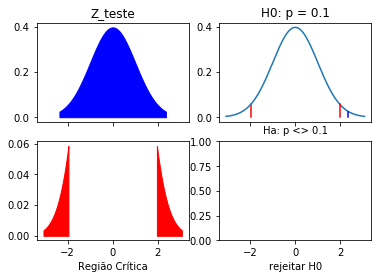

In [8]:
lim_g= max(abs(z_teste),abs(z_alfa))
x= np.linspace(-lim_g*1.3,lim_g*1.3,3000)       # gera um intervalo no eixo x em toda a distribuição
y= rv.pdf(x)
if(cauda=='i'):  
    x1= np.linspace(-lim_g*1.3, z_teste, 3000)       # intervalo x entre limite inferior e z_teste
    y1= rv.pdf(x1)
    x2= np.linspace(-lim_g*1.3, z_alfa,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
if(cauda=='s'):  
    x1= np.linspace(z_teste, lim_g*1.3,3000)       # intervalo x entre z_teste e limite superior
    y1= rv.pdf(x1)
    x2= np.linspace(z_alfa,lim_g*1.3,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
if(cauda=='b'):  
    x1= np.linspace(z_teste, -z_teste,3000)       # intervalo x entre z_teste e limite superior
    y1= rv.pdf(x1)
    x2= np.linspace(z_alfa,lim_g*1.3,3000)       # gera um intervalo no eixo x na região crítica
    y2= rv.pdf(x2)
    fig, a= plt.subplots(2,2,sharex='all')
    a[1][0].fill_between(-x2,rv.pdf(-x2),color='red')                    # área região  critica inferior
    a[0][1].plot([-z_alfa, -z_alfa], [0, rv.pdf(z_alfa)], color= 'red') # marcação reg. critica inferior
a[0][0].fill_between(x1,y1, color='blue')
a[0][0].set_title('Z_teste')
a[1][0].fill_between(x2,y2,color='red')
a[1][0].set_xlabel('Região Crítica')
a[0][1].plot(x,y)
a[0][1].plot([z_teste,z_teste],[0,rv.pdf(z_teste)], color='blue')
a[0][1].plot([z_alfa, z_alfa], [0, rv.pdf(z_alfa)], color= 'red')
a[0][1].set_title('H0: '+l_teste[0])
a[0][1].set_xlabel('Ha: '+l_teste[1])
a[1][1].set_xlabel(rej(vlr_p,alfa) + ' H0')